In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#We will use sklearn for building logistic regression model
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the data.
data = pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# more information about the dataset.
# Dataset has 33 columns and 569 rows.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# lets drop the columns 'Unnamed: 32' and 'id' that are not important.

data=data.drop(['Unnamed: 32', 'id'], axis = 1)
#data

In [5]:
# find the count of Class attribute(B for benign, M for malignant)
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

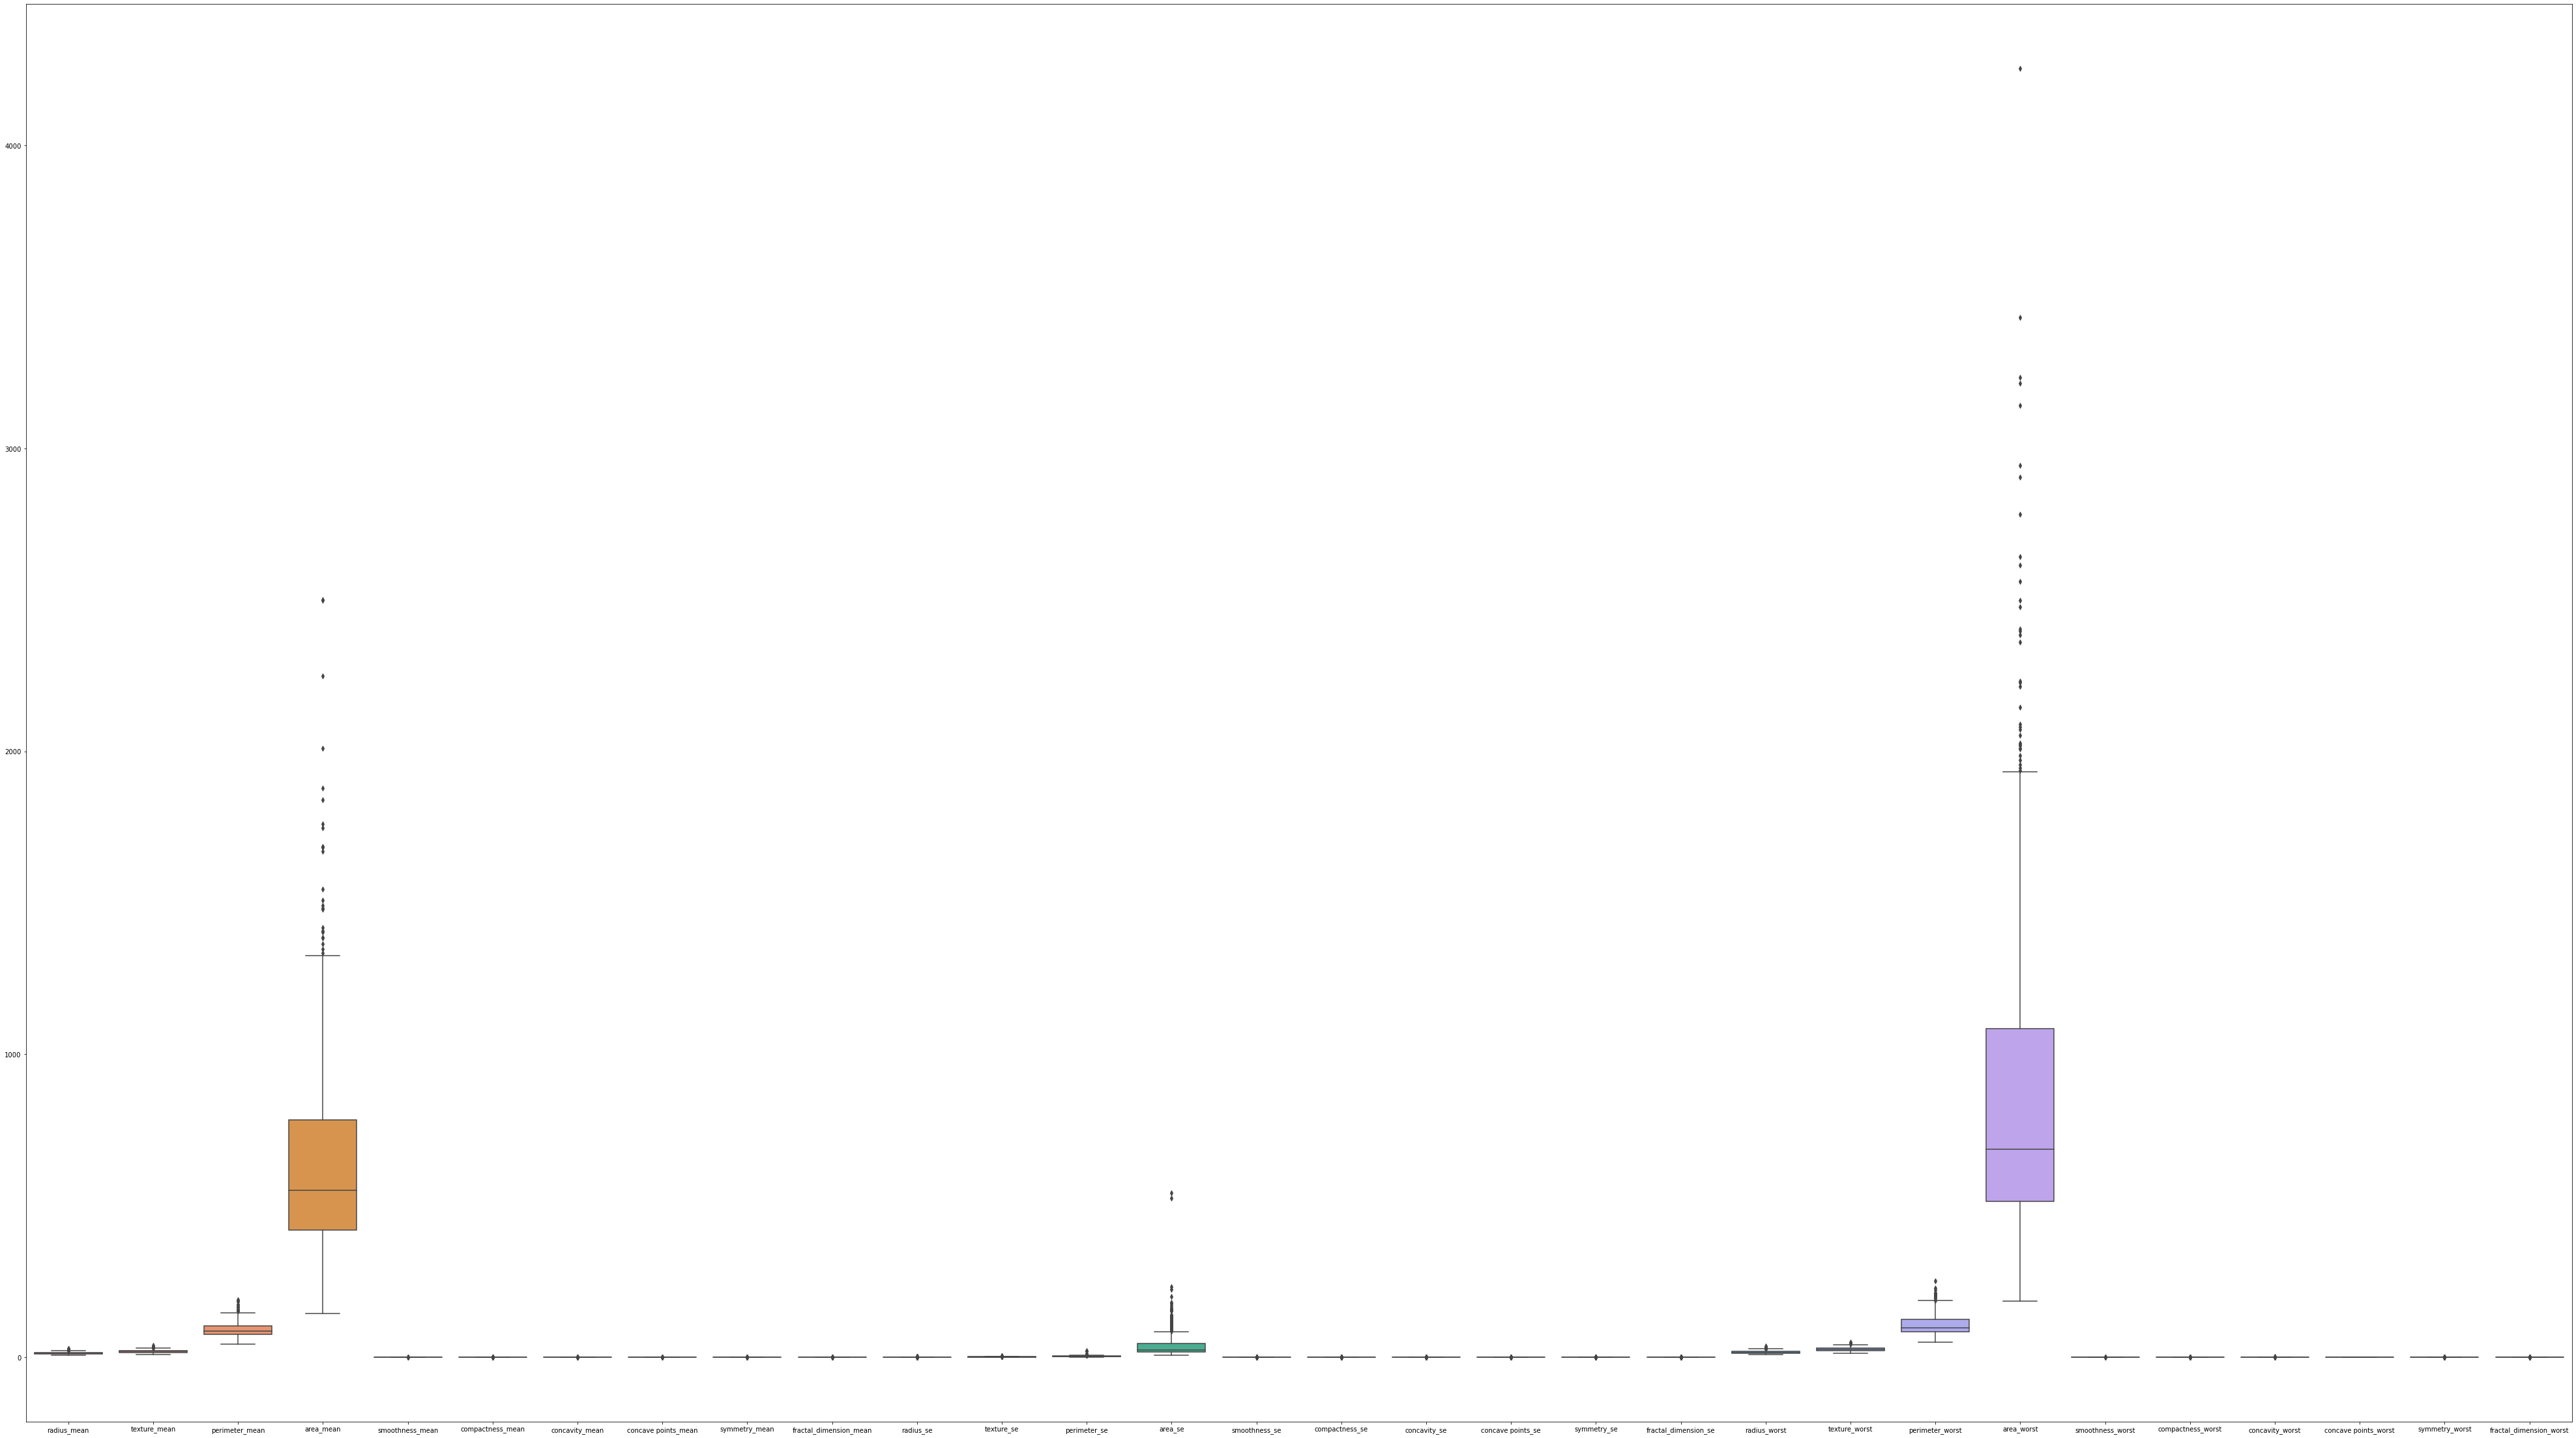

In [6]:
#Boxplot Visualization
plt.figure(figsize=(70,40))
sns.boxplot(data=data)

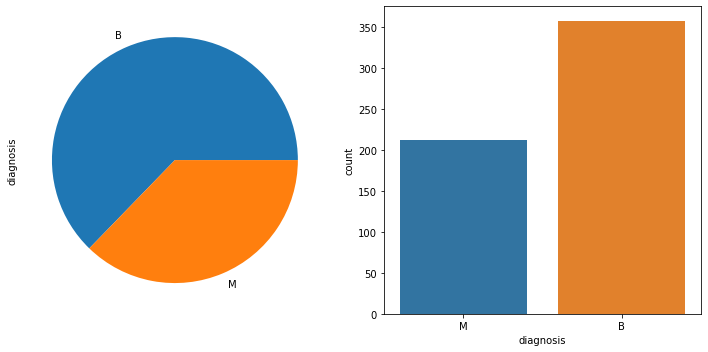

In [8]:
#Exploratory Data Analysis

# chart for distribution of target variable
fig= plt.figure(figsize=(10,5) )
fig.add_subplot(1,2,1)
a= data["diagnosis"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)

churnchart=sns.countplot(x=data["diagnosis"])
plt.tight_layout()
plt.show()

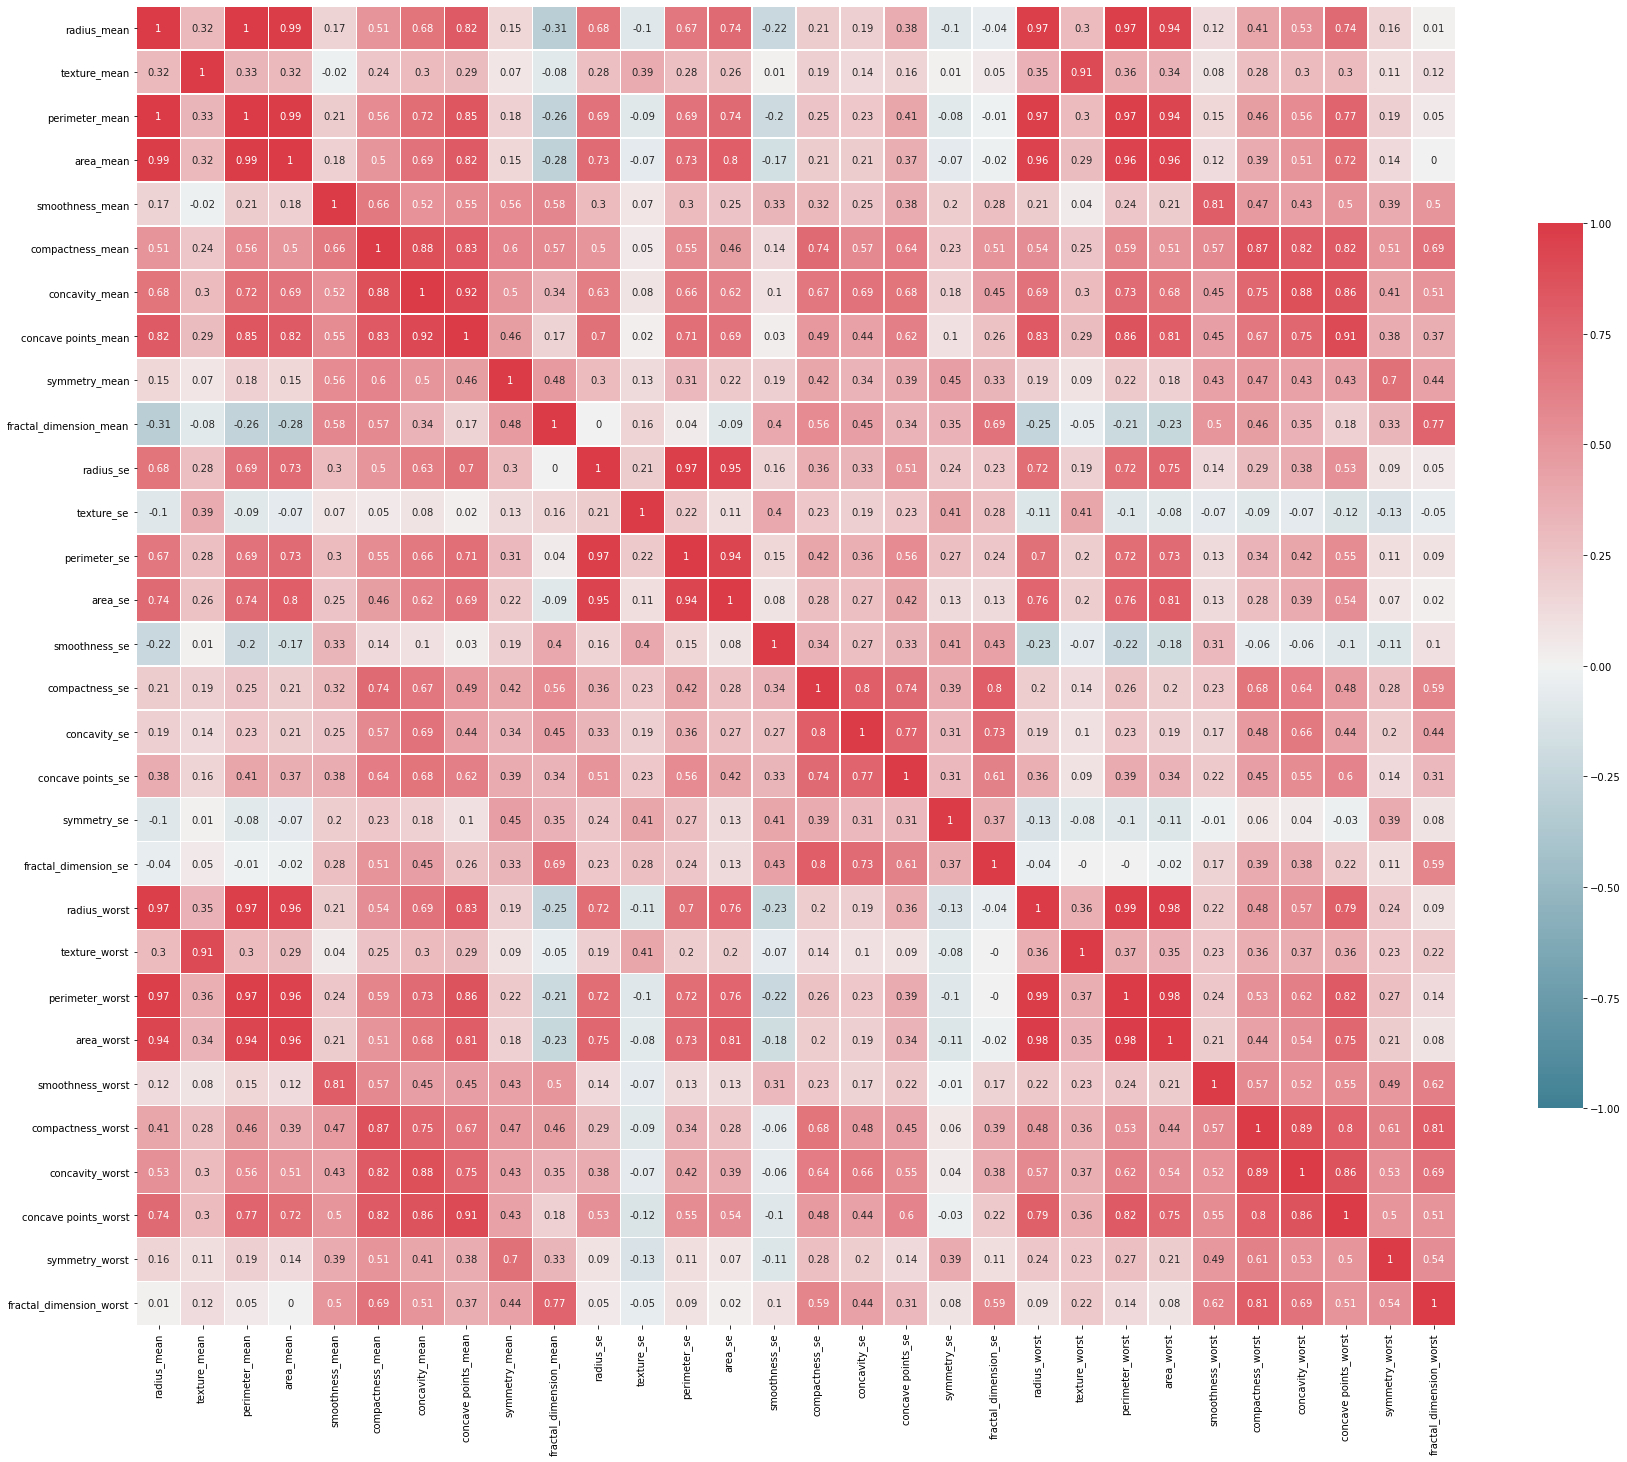

In [9]:
# Generate and visualize the correlation matrix
corr = data.corr().round(2)
# Set figure size
f, ax = plt.subplots(figsize=(25, 25))
# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr,cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

We can see the presence of multicollinearity between some of our variables.

We will drop all columns from our dataset that doesnt give much information, We will now go head and drop all unnecessary columns.

In [10]:
# first, drop all "worst" columns
cols = ['radius_worst', 'texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst',
        'concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
data = data.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean','perimeter_se','area_mean','area_se']
data = data.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean','concavity_se','concave points_mean','concave points_se']
data = data.drop(cols, axis=1)

# verify remaining columns
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

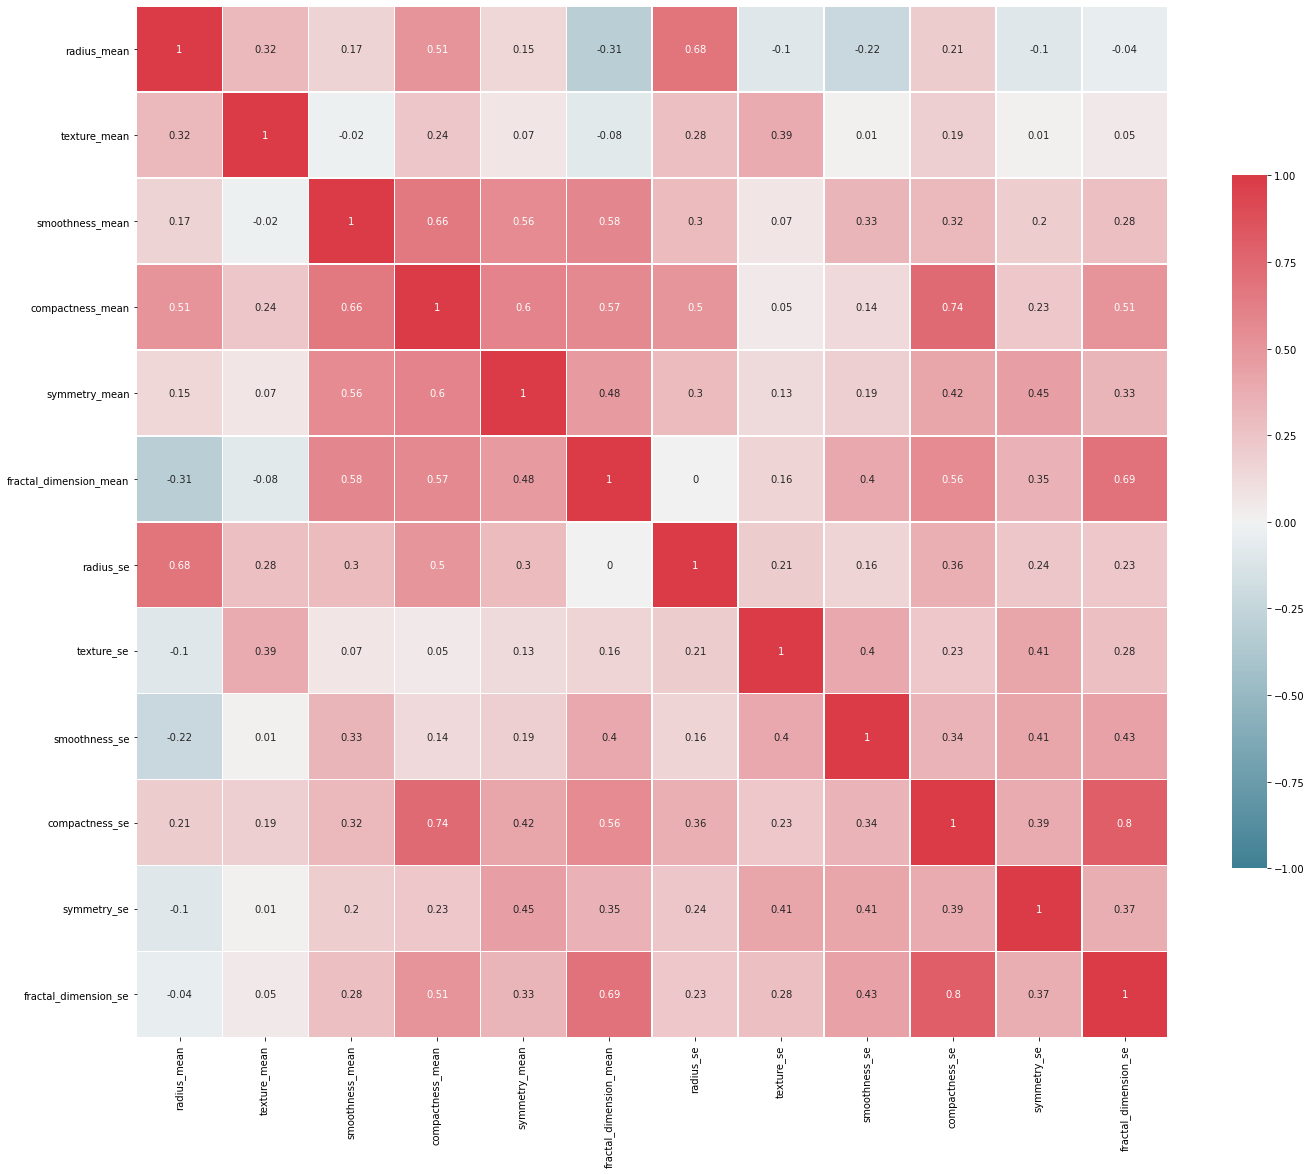

In [11]:
# Draw the heatmap again, with the new correlation matrix
corr = data.corr().round(2)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr,cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

# SVM and Naive Bayes

In [13]:
#Create x and y variables
x=data.drop('diagnosis', axis=1).to_numpy()
y=data['diagnosis'].to_numpy()

#Create Training and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, stratify=y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [14]:
#Script for SVM and NB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('SVM', SVC(kernel='linear',random_state=100)), ('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['benign','malignant']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))


Estimator: SVM
[[65  7]
 [ 5 37]]
              precision    recall  f1-score   support

      benign       0.93      0.90      0.92        72
   malignant       0.84      0.88      0.86        42

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114


Estimator: Naive Bayes
[[65  7]
 [10 32]]
              precision    recall  f1-score   support

      benign       0.87      0.90      0.88        72
   malignant       0.82      0.76      0.79        42

    accuracy                           0.85       114
   macro avg       0.84      0.83      0.84       114
weighted avg       0.85      0.85      0.85       114



##### SVM Model

Precision: Precision is how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In this case it is 90%.

Recall: Recall is the ratio of correctly predicted positive observations to the all observations in actual class. When the model predicts positive, how often is it correct? The model is 89%.

Accuracy is the ratio of correct prediction to the total predictions made. In this model we have only 89% accurate data.

F1 Score: F1 score is the weighted average of Precision and Recall. In this case the F1 score is 90%.

##### Naive Bayes Model

Precision: Precision is how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In this case it is 85%.

Recall: Recall is the ratio of correctly predicted positive observations to the all observations in actual class. When the model predicts positive, how often is it correct? The model is 85%.

Accuracy is the ratio of correct prediction to the total predictions made. In this model we have only 85% accurate data.

F1 Score: F1 score is the weighted average of Precision and Recall. In this case the F1 score is 85%.
